<a href="https://colab.research.google.com/github/3b032092/2025_ML_Hws/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#第四題

##加入所需套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

##載入 Fashion MNIST

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##顯示資料形狀

In [3]:
print("訓練資料形狀:", x_train.shape)
print("測試資料形狀:", x_test.shape)

訓練資料形狀: (60000, 28, 28)
測試資料形狀: (10000, 28, 28)


##標籤對應的類別名稱

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##顯示三張訓練圖片和其標籤

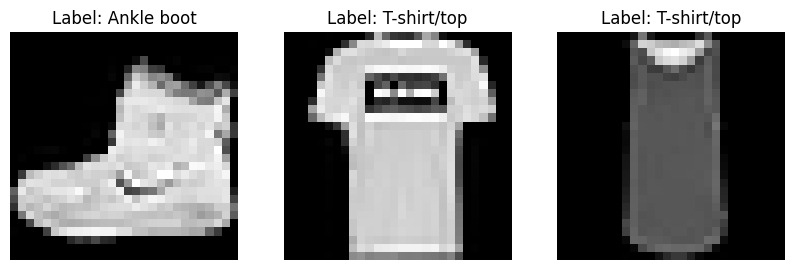

In [5]:
plt.figure(figsize=(10, 3))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {class_names[y_train[i]]}")
    plt.axis('off')
plt.show()

##正規化：將像素值縮放到 0~1

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

##建立神經網路模型

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##訓練神經網路模型

In [8]:
history = model.fit(x_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7661 - loss: 0.6791 - val_accuracy: 0.8587 - val_loss: 0.3984
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8557 - loss: 0.3897 - val_accuracy: 0.8626 - val_loss: 0.3818
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8737 - loss: 0.3431 - val_accuracy: 0.8724 - val_loss: 0.3598
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8808 - loss: 0.3216 - val_accuracy: 0.8748 - val_loss: 0.3530
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8881 - loss: 0.2989 - val_accuracy: 0.8809 - val_loss: 0.3267
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8952 - loss: 0.2777 - val_accuracy: 0.8764 - val_loss: 0.3439
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8998 - loss: 0.2639 - val_accuracy: 0.8756 - val_loss: 0.3557
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9021 - loss: 0.2567

##顯示 loss & accuracy 的折線圖，檢查 overfitting

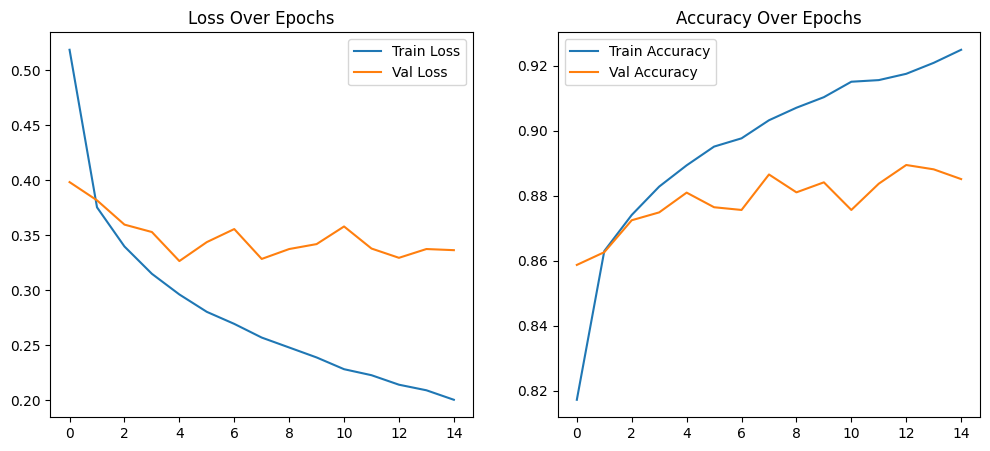

In [9]:
plt.figure(figsize=(12, 5))
# Loss 圖
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')

# Accuracy 圖
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

##評估模型準確率

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8790 - loss: 0.3661
Test Accuracy: 0.8794


##預測並顯示數張圖片、預測結果與真實標籤

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


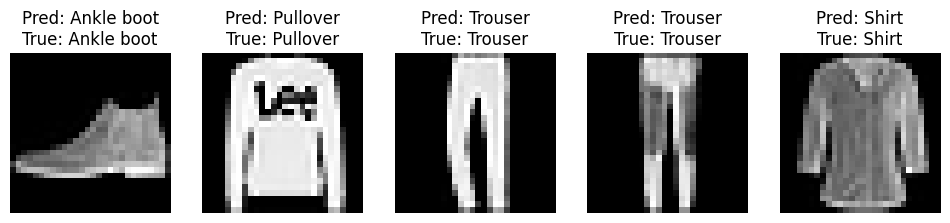

In [11]:
predictions = model.predict(x_test)

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = y_test[i]
    plt.title(f"Pred: {class_names[pred_label]}\nTrue: {class_names[true_label]}")
    plt.axis('off')
plt.show()

##混淆矩陣

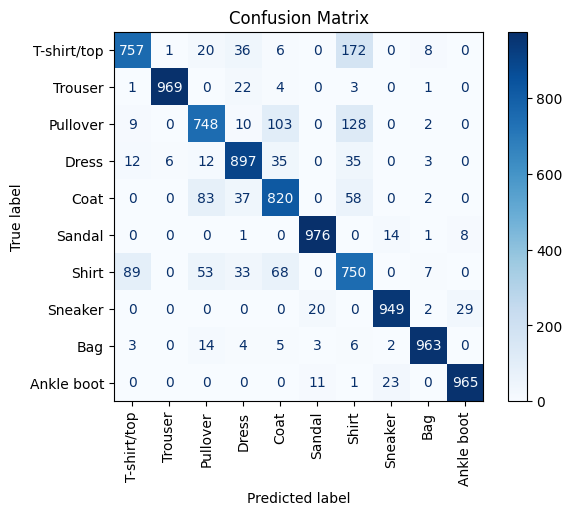

In [12]:
y_pred = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

##儲存完整模型

In [13]:
model.save('fashion_mnist_model.h5')
print("模型已儲存為 fashion_mnist_model.h5")

模型已儲存為 fashion_mnist_model.h5


##改進版的 DNN

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),  # 避免 overfitting
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 加入 EarlyStopping（提早停止以避免 overfitting）
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=30,
                    validation_split=0.2,
                    callbacks=[early_stop])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6973 - loss: 0.8278 - val_accuracy: 0.8474 - val_loss: 0.4260
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8325 - loss: 0.4688 - val_accuracy: 0.8641 - val_loss: 0.3833
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8496 - loss: 0.4124 - val_accuracy: 0.8645 - val_loss: 0.3739
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8556 - loss: 0.3950 - val_accuracy: 0.8672 - val_loss: 0.3685
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8590 - loss: 0.3819 - val_accuracy: 0.8739 - val_loss: 0.3474
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8652 - loss: 0.3655 - val_accuracy: 0.8677 - val_loss: 0.3698
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8695 - loss: 0.3505 - val_accuracy: 0.8798 - val_loss: 0.3292
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8744 - loss: 0.